In [1]:
import torch
import torchtext.vocab

In [2]:
glove = torchtext.vocab.GloVe(name='6B', dim=100)

print(f'There are {len(glove.itos)} words in the vocabulary')

.vector_cache/glove.6B.zip: 862MB [02:39, 5.39MB/s]                               
100%|█████████▉| 399999/400000 [00:06<00:00, 64892.97it/s]


There are 400000 words in the vocabulary


In [3]:
glove.vectors.shape

torch.Size([400000, 100])

In [4]:
glove.itos[:15]

['the',
 ',',
 '.',
 'of',
 'to',
 'and',
 'in',
 'a',
 '"',
 "'s",
 'for',
 '-',
 'that',
 'on',
 'is']

In [5]:
glove.stoi['the']

0

In [6]:
glove.stoi['dazzle']

36623

In [7]:
def get_vector(embeddings, word):

    assert word in embeddings.stoi, f'*{word}* is not in the vocab!'

    return embeddings.vectors[embeddings.stoi[word]]

In [8]:
get_vector(glove, 'paper')

tensor([-0.8503,  0.3336, -0.6589, -0.4987,  0.3659, -0.1925,  0.2566, -0.0534,
         0.3147,  0.2443,  0.2934, -0.4492,  0.1517,  0.3931, -0.3179,  0.0605,
         0.8177, -0.3885,  0.7676, -1.1041, -0.1544,  0.3165, -0.3724, -0.1148,
         0.5163, -0.3929,  0.1630, -0.2532, -0.5098,  0.1520,  0.2781,  0.5252,
        -0.3882, -0.3472, -0.6182,  0.1702,  0.1225, -0.2419, -0.3888, -0.5318,
        -0.4699, -0.7050, -0.6213, -0.3869, -0.8564, -0.4100, -0.4749, -0.2108,
        -0.8134, -0.5240,  0.4989,  0.3791,  0.5543,  1.1230, -0.4212, -1.5674,
        -0.5689,  0.4082,  1.7949,  0.1686, -0.0029,  0.2879, -0.9009, -0.0942,
         0.7999, -0.3910,  0.7629,  0.7131,  0.1319, -0.4076, -0.1869,  0.8956,
         0.4687, -0.0029,  0.0253,  1.0084,  0.1714,  0.5974, -1.1003,  0.4931,
         0.4178,  0.1728, -0.4947,  0.0878, -0.9669, -1.0920,  0.3390, -0.5129,
         0.2464,  0.2714,  0.2421, -0.2171,  0.5504,  0.0082, -0.4557,  0.1353,
        -0.0431, -0.4141,  0.7005,  0.18

In [9]:
def closest(embeddings, vector, n = 6):

    distances = []

    for neighbor in embeddings.itos:
        distances.append((neighbor, torch.dist(vector, get_vector(embeddings, neighbor))))

    return sorted(distances, key = lambda x: x[1])[:n]

In [10]:
closest(glove, get_vector(glove, 'paper'))

[('paper', tensor(0.)),
 ('papers', tensor(3.8442)),
 ('printed', tensor(4.1970)),
 ('print', tensor(4.2666)),
 ('sheet', tensor(4.3835)),
 ('printing', tensor(4.4179))]

In [11]:
closest(glove, get_vector(glove, 'shenanigans'))

[('shenanigans', tensor(0.)),
 ('chicanery', tensor(2.3785)),
 ('hijinks', tensor(2.6764)),
 ('escapades', tensor(2.7821)),
 ('machinations', tensor(2.8699)),
 ('gamesmanship', tensor(2.9044))]

In [13]:
def print_tuples(tuples):

    for t in tuples:
        print('(%.4f) %s' % (t[1], t[0]))

In [14]:
print_tuples(closest(glove, get_vector(glove, 'stupendous')))

(0.0000) stupendous
(2.5795) marvellous
(2.7539) frightful
(2.8506) stupefying
(2.8561) awe-inspiring
(2.9179) mind-blowing


In [18]:
def analogy(embeddings, w1, w2, w3, n = 6):

    print('\n[%s : %s :: %s : ?]' % (w1, w2, w3))

    closest_words = closest(embeddings, get_vector(embeddings, w2) - get_vector(embeddings, w1) + get_vector(embeddings, w3), n + 3)

    closest_words = [x for x in closest_words if x[0] not in [w1, w2, w3]][:n]

    return closest_words

In [19]:
print_tuples(analogy(glove, 'moon', 'night', 'sun'))


[moon : night :: sun : ?]
(5.7069) morning
(5.7276) afternoon
(5.8023) evening
(6.1410) hours
(6.2797) saturday
(6.3056) sunday


In [21]:
print_tuples(analogy(glove, 'fly', 'bird', 'swim'))


[fly : bird :: swim : ?]
(5.9754) swimming
(6.2409) shark
(6.4822) dolphin
(6.5421) whale
(6.6276) cat
(6.6457) gorilla


In [22]:
print_tuples(analogy(glove, 'earth', 'moon', 'sun'))


[earth : moon :: sun : ?]
(6.2294) lee
(6.4125) kang
(6.4644) tan
(6.4757) yang
(6.4853) lin
(6.5220) chong


In [23]:
!pip3 install spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 16.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.6/458.6 kB 11.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.9/709.9 kB 12.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.8 MB/s eta 0:00:00a 0:00:01


In [24]:
!python3 -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 19.9 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [25]:
import spacy

spacy.__version__

'3.4.1'

In [26]:
import torch
import torchtext
from torchtext import datasets

import re
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [27]:
tweets = pd.read_csv('./datasets/tweets/tweets.csv', error_bad_lines = False)

tweets = tweets.head(50000)
tweets.head()

/var/folders/gt/sbz9rptd4qb0s6w3gb_sy48c0000gn/T/ipykernel_4050/4246006708.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tweets = pd.read_csv('./datasets/tweets/tweets.csv', error_bad_lines = False)


,ItemID,Sentiment,SentimentSource,SentimentText
0,1,neg,Sentiment140,is so sad for my APL frie...
1,2,neg,Sentiment140,I missed the New Moon trail...
2,3,pos,Sentiment140,omg its already 7:30 :O
3,4,neg,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I've been at...
4,5,neg,Sentiment140,i think mi bf is cheating on me!!! ...


In [28]:
tweets = tweets.drop(columns= ['ItemID', 'SentimentSource'], axis = 1)

tweets.head()

,Sentiment,SentimentText
0,neg,is so sad for my APL frie...
1,neg,I missed the New Moon trail...
2,pos,omg its already 7:30 :O
3,neg,.. Omgaga. Im sooo im gunna CRy. I've been at...
4,neg,i think mi bf is cheating on me!!! ...


In [29]:
tweets.shape

(50000, 2)

In [30]:
tweets['Sentiment'].unique()

array(['neg', 'pos'], dtype=object)

In [31]:
tweets.Sentiment.value_counts()

pos    26921
neg    23079
Name: Sentiment, dtype: int64

[Text(0.5, 0, 'Labels')]

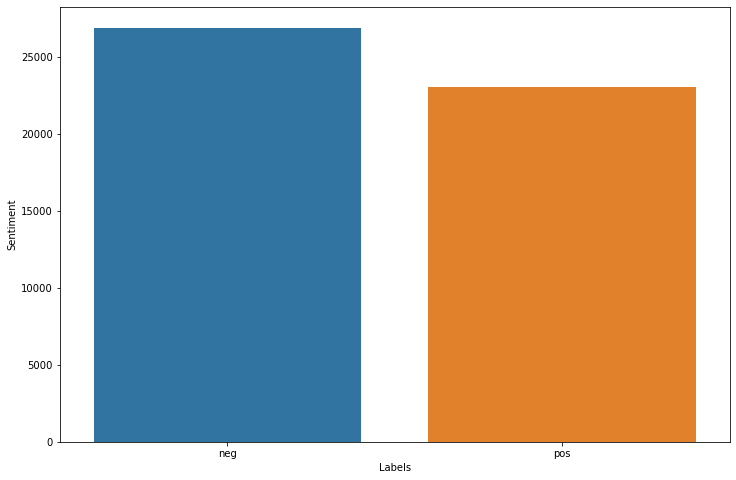

In [32]:
fig = plt.figure(figsize=(12, 8))

ax = sns.barplot(x=tweets.Sentiment.unique(), y=tweets.Sentiment.value_counts())

ax.set(xlabel='Labels')

In [33]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(tweets, test_size=0.2, random_state=42)

In [34]:
train.reset_index(drop=True), test.reset_index(drop=True)

(      Sentiment                                      SentimentText
 0           pos  @amyrenea omg so am I lol I fell asleep when i...
 1           neg               @Adrienne_Bailon I want a shout out 
 2           neg  @Anonymousboy03 Plans for school stuff &amp; a...
 3           neg  ... has hit a writer's block .. am loosing my ...
 4           neg  ... trying to find people I know! I`m bored, i...
 ...         ...                                                ...
 39995       pos   #robotpickuplines are so funny. check them out. 
 39996       pos  @annyo84 awh thankss.  yeah, i understand what...
 39997       pos  @AmbiguityX ohh you're in twin cities?  i luv ...
 39998       neg   Dinara lost again in Roland Garros. Why the S...
 39999       pos  *yawn* fucking time zones shit. I'm really sic...
 
 [40000 rows x 2 columns],
      Sentiment                                      SentimentText
 0          pos  @aimeesays aww i hope it does fly by because J...
 1          neg  #don

In [35]:
train.to_csv('./datasets/tweets/train_tweets.csv', index=False)
test.to_csv('./datasets/tweets/test_tweets.csv', index=False)

In [36]:
def tweet_clean(text):

    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)
    text = re.sub(r'https?:/\/\S+', ' ', text)

    return text.strip()

In [38]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger', 'ner'])

def tokenizer(s):
    return [w.text.lower() for w in nlp(tweet_clean(s))]

In [39]:
TEXT = torchtext.data.Field(tokenize = tokenizer)

LABEL = torchtext.data.LabelField(dtype = torch.float)

In [40]:
datafields = [('Sentiment', LABEL), ('SentimentText', TEXT)]

In [41]:
trn, tst = torchtext.data.TabularDataset.splits(path= './datasets/tweets/', train= 'train_tweets.csv', test= 'test_tweets.csv', format = 'csv', skip_header = True, fields = datafields)

/Users/anishmitagar/miniforge3/envs/m1pytorch/lib/python3.9/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [42]:
print(f'Number of training examples: {len(trn)}')
print(f'Number of testing examples: {len(tst)}')

Number of training examples: 40000
Number of testing examples: 10000


In [43]:
vars(trn.examples[0])

{'Sentiment': 'pos',
 'SentimentText': ['amyrenea',
  'omg',
  'so',
  'am',
  'i',
  'lol',
  'i',
  'fell',
  'asleep',
  'when',
  'it',
  'was',
  'on',
  'last',
  'night',
  'so',
  'now',
  'i',
  'get',
  'to',
  'finish',
  'it']}

In [44]:
TEXT.build_vocab(trn, max_size=25000, vectors="glove.6B.100d", unk_init=torch.Tensor.normal_)

LABEL.build_vocab(trn)

In [45]:
print(TEXT.vocab.freqs.most_common(50))

[('i', 25644), ('the', 12219), ('to', 12111), ('you', 10723), ('a', 9197), ('it', 8440), ('and', 6889), ('my', 6208), ('quot', 5582), ('s', 5565), ('that', 5306), ('is', 5203), ('for', 4971), ('in', 4852), ('t', 4844), ('m', 4683), ('me', 4588), ('of', 4331), ('on', 3918), ('have', 3752), ('so', 3612), ('but', 3506), ('be', 2932), ('not', 2887), ('was', 2775), ('just', 2724), ('can', 2523), ('do', 2418), ('are', 2351), ('your', 2320), ('with', 2269), ('good', 2203), ('like', 2173), ('at', 2131), ('no', 2119), ('this', 2094), ('all', 2069), ('up', 2066), ('now', 2063), ('get', 2044), ('we', 1988), ('u', 1890), ('love', 1885), ('lol', 1864), ('too', 1826), ('what', 1760), ('out', 1742), ('know', 1664), ('nt', 1608), ('amp', 1539)]


In [46]:
print(TEXT.vocab.itos[:10])

['<unk>', '<pad>', 'i', 'the', 'to', 'you', 'a', 'it', 'and', 'my']


In [47]:
print(LABEL.vocab.stoi)

defaultdict(None, {'pos': 0, 'neg': 1})


In [51]:
train_iterator, test_iterator = torchtext.data.BucketIterator.splits((trn, tst), batch_size=64, sort_key=lambda x: len(x.SentimentText), sort_within_batch=False)

In [52]:
import torch.nn as nn

class RNN(nn.Module):

    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):

        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        self.rnn = nn.GRU(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout)

        self.fc = nn.Linear(hidden_dim*2, output_dim)

        self.dropout = nn.Dropout(dropout)
    
    def forward(self, text):

        embedded = self.dropout(self.embedding(text))

        output, hidden = self.rnn(embedded)

        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))

        return self.fc(hidden.squeeze(0))

In [53]:
input_dim = len(TEXT.vocab)

embedding_dim = 100

hidden_dim = 20
output_dim = 1

n_layers = 2
bidirectional = True

dropout = 0.5

In [54]:
model = RNN(input_dim, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout)

In [55]:
model

RNN(
  (embedding): Embedding(25002, 100)
  (rnn): GRU(100, 20, num_layers=2, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=40, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [56]:
pretrained_embedding = TEXT.vocab.vectors

print(pretrained_embedding.shape)

torch.Size([25002, 100])


In [57]:
model.embedding.weight.data.copy_(pretrained_embedding)

tensor([[ 0.4184,  0.1735,  0.7379,  ..., -0.1453, -2.6076,  1.1391],
        [-0.5602,  0.6973,  1.7147,  ...,  1.4301,  1.2774,  0.1010],
        [-0.0465,  0.6197,  0.5665,  ..., -0.3762, -0.0325,  0.8062],
        ...,
        [-1.3874, -0.0674, -1.1876,  ...,  0.6008,  0.2123, -1.5581],
        [-0.1194,  0.6886,  0.1779,  ..., -0.5569,  0.7120,  0.0788],
        [ 0.7208,  0.7842, -0.6756,  ..., -0.6402,  0.5416, -0.9089]])

In [58]:
unk_idx = TEXT.vocab.stoi[TEXT.unk_token]
pad_idx = TEXT.vocab.stoi[TEXT.pad_token]

model.embedding.weight.data[unk_idx] = torch.zeros(embedding_dim)
model.embedding.weight.data[pad_idx] = torch.zeros(embedding_dim)

print(model.embedding.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0465,  0.6197,  0.5665,  ..., -0.3762, -0.0325,  0.8062],
        ...,
        [-1.3874, -0.0674, -1.1876,  ...,  0.6008,  0.2123, -1.5581],
        [-0.1194,  0.6886,  0.1779,  ..., -0.5569,  0.7120,  0.0788],
        [ 0.7208,  0.7842, -0.6756,  ..., -0.6402,  0.5416, -0.9089]])


In [59]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

criterion = nn.BCEWithLogitsLoss()

In [60]:
def train(model, iterator, optimizer, criterion):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for batch in iterator:

        optimizer.zero_grad()

        predictions = model(batch.SentimentText).squeeze(1)

        loss = criterion(predictions, batch.Sentiment)

        rounded_preds = torch.round(torch.sigmoid(predictions))
        correct = (rounded_preds == batch.Sentiment).float()

        acc = correct.sum() / len(correct)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [61]:
num_epochs = 10

for epoch in range(num_epochs):

    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)

    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% |')

| Epoch: 01 | Train Loss: 0.632 | Train Acc: 63.71% |
| Epoch: 02 | Train Loss: 0.540 | Train Acc: 73.55% |
| Epoch: 03 | Train Loss: 0.496 | Train Acc: 76.19% |
| Epoch: 04 | Train Loss: 0.470 | Train Acc: 78.00% |
| Epoch: 05 | Train Loss: 0.446 | Train Acc: 79.23% |
| Epoch: 06 | Train Loss: 0.425 | Train Acc: 80.90% |
| Epoch: 07 | Train Loss: 0.407 | Train Acc: 81.73% |
| Epoch: 08 | Train Loss: 0.393 | Train Acc: 82.73% |
| Epoch: 09 | Train Loss: 0.378 | Train Acc: 83.29% |
| Epoch: 10 | Train Loss: 0.362 | Train Acc: 84.55% |


In [62]:
epoch_loss = 0
epoch_acc = 0

model.eval()

with torch.no_grad():

    for batch in test_iterator:

        predictions = model(batch.SentimentText).squeeze(1)

        loss = criterion(predictions, batch.Sentiment)

        rounded_preds = torch.round(torch.sigmoid(predictions))
        correct = (rounded_preds == batch.Sentiment).float()

        acc = correct.sum()/len(correct)

        epoch_loss += loss.item()
        epoch_acc += acc.item()

test_loss = epoch_loss / len(test_iterator)
test_acc = epoch_acc / len(test_iterator)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.485 | Test Acc: 77.47%


In [70]:
sentence = "I love that show"

In [71]:
tokenized = [tok.text for tok in nlp.tokenizer(sentence)]

In [72]:
indexed = [TEXT.vocab.stoi[t] for t in tokenized]

In [73]:
tensor = torch.LongTensor(indexed)

In [74]:
tensor = tensor.unsqueeze(1)

In [75]:
prediction = torch.sigmoid(model(tensor))

In [76]:
prediction.item()

0.16953828930854797